In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 15)

Wat wil ik laten zien? Afstand tussen perspectieven door de tijd heen: Dus gegegeven partij en topic, plot onderlinge afstanden tussen opinions in heatmap.

Wat heb ik nodig?

* topic nummer
* partij
* lijst perspectieven van partij door de tijd heen (juiste volgorde)
* matrix met onderlinge jsd afstand voor lijst perspectieven
* code om plot te maken

In [7]:
from cptm.utils.experiment import load_topics, load_opinions


config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

topics = load_topics(config)
opinions = load_opinions(config)

In [8]:
from cptm.utils.topics import get_top_topic_words, topic_str

topic = 33

df = get_top_topic_words(topics, opinions, str(topic))
print topic_str(df)
#topic_str(df, single_line=False, weights=False, opinions=True)

                 topic Balkenende III-PvdD Balkenende II-CDA  \
0          asielzoeker               links         tijdelijk   
1          vreemdeling             onnodig        humanitair   
2               opvang              rechts               wit   
3            terugkeer            centraal        schrijnend   
4            procedure         gezamenlijk           syrisch   
5  verblijfsvergunning           kwetsbaar       minderjarig   
6               pardon              humaan        rechtmatig   
7             herkomst             onzeker         congolees   
8             verblijf          onredelijk          ontheemd   
9             illegaal             coulant            streng   

  Balkenende I-GroenLinks Balkenende III-PvdA Rutte I-GroenLinks  \
0           discretionair           tijdelijk           illegaal   
1              rechtmatig              streng    strafrechtelijk   
2                  legaal              spaans      discretionair   
3               voorlop

/home/jvdzwaan/code/DilipadTopicModelling/cptm/utils/topics.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  topic.sort(ascending=False)
/home/jvdzwaan/code/DilipadTopicModelling/cptm/utils/topics.py:26: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  opinion.sort(ascending=False)


In [9]:
t = 49 # onderwijs
party = 'PvdA'
perspectives = [p for p in opinions.keys() if p.endswith(party)]
print perspectives

['Balkenende III-PvdA', 'Kok II-PvdA', 'Balkenende I-PvdA', 'Balkenende II-PvdA', 'Balkenende IV-PvdA', 'Rutte I-PvdA']


In [10]:
from cptm.utils.controversialissues import filter_opinions

opinions = filter_opinions(perspectives, opinions)

In [11]:
from cptm.utils.controversialissues import perspective_jsd_matrix

jsd = perspective_jsd_matrix(opinions, config.get('nTopics'))
jsd.shape

(100, 6, 6)

(6, 6)


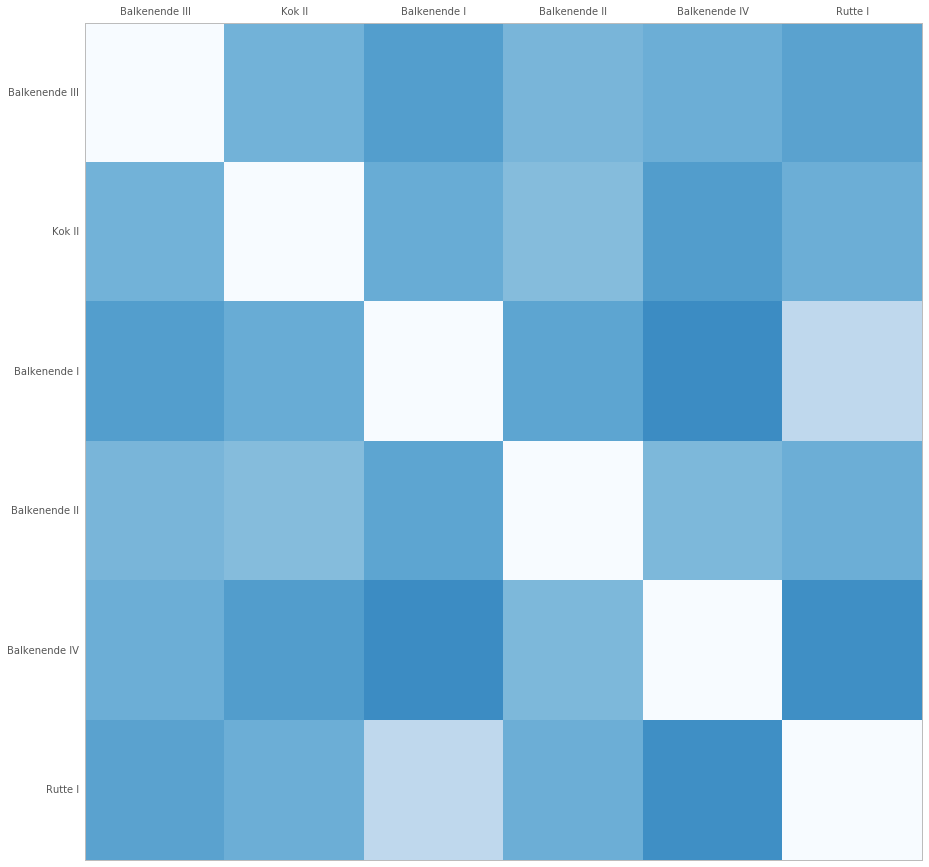

In [12]:
data = jsd[t]
print data.shape
labels = [p.replace('-{}'.format(party), '') for p in perspectives]

fig, ax = plt.subplots()
ax.pcolor(data, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(labels, minor=False)

plt.show()
plt.close()

In [13]:
from scipy.spatial.distance import pdist, squareform

data = np.zeros((len(opinions[perspectives[0]].index), len(perspectives)))
for i, p in enumerate(perspectives):
    data[:, i] = opinions[p].loc[:, str(t)]
print data.shape
print data

dist = squareform(pdist(data.T, 'cosine'))
print dist.shape
print dist

(6245, 6)
[[  9.90221285e-05   2.42551367e-05   9.06132655e-05   1.96896436e-05
    1.26357202e-05   1.93978785e-05]
 [  9.90221285e-05   2.42551367e-05   9.06132655e-05   2.91171226e-04
    1.26357202e-05   1.93978785e-05]
 [  9.90221285e-05   1.35813722e-04   9.06132655e-05   1.96896436e-05
    1.26357202e-05   1.93978785e-05]
 ..., 
 [  1.02302162e-03   2.47372307e-04   9.06132655e-05   1.96896436e-05
    1.90561432e-03   1.95595361e-04]
 [  9.90221285e-05   2.42551367e-05   9.06132655e-05   1.96896436e-05
    1.26357202e-05   1.93978785e-05]
 [  9.90221285e-05   2.42551367e-05   9.06132655e-05   2.87042923e-04
    1.26357202e-05   1.93978785e-05]]
(6, 6)
[[ 0.          0.78130686  0.72819891  0.72006417  0.84619949  0.75949539]
 [ 0.78130686  0.          0.66361813  0.41057784  0.62810462  0.4973809 ]
 [ 0.72819891  0.66361813  0.          0.55445298  0.87212065  0.60856207]
 [ 0.72006417  0.41057784  0.55445298  0.          0.48693918  0.43177584]
 [ 0.84619949  0.62810462  0.8721

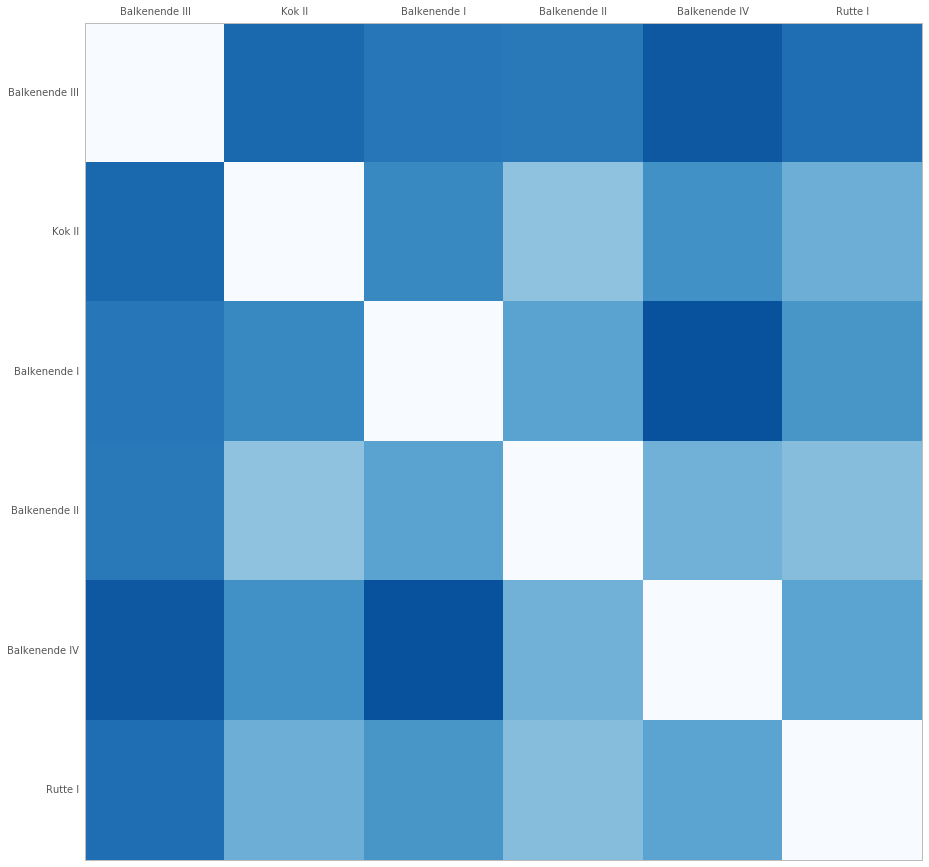

In [14]:
# do the same, but now using cosine distance
fig, ax = plt.subplots()
ax.pcolor(dist, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(dist.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(dist.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(labels, minor=False)

plt.show()
plt.close()

In [15]:
import numpy as np

def reorder_perspectives(perspectives, ordered_perspectives, distance_matrix):
    result = np.zeros(distance_matrix.shape)
    for i, persp1 in enumerate(ordered_perspectives):
        for j, persp2 in enumerate(ordered_perspectives):
            result[i, j] = distance_matrix[perspectives.index(persp1), perspectives.index(persp2)]
    return result

#dm = np.array([[0.0, 2.0, 1.0], [2.0, 0.0, 1.0], [1.0, 1.0, 0.0]])
#perspectives_ordered = ['0', '1',  '2']
#perspectives = ['2', '1', '0']
#print dm
#print reorder_perspectives(perspectives, perspectives_ordered, dm)

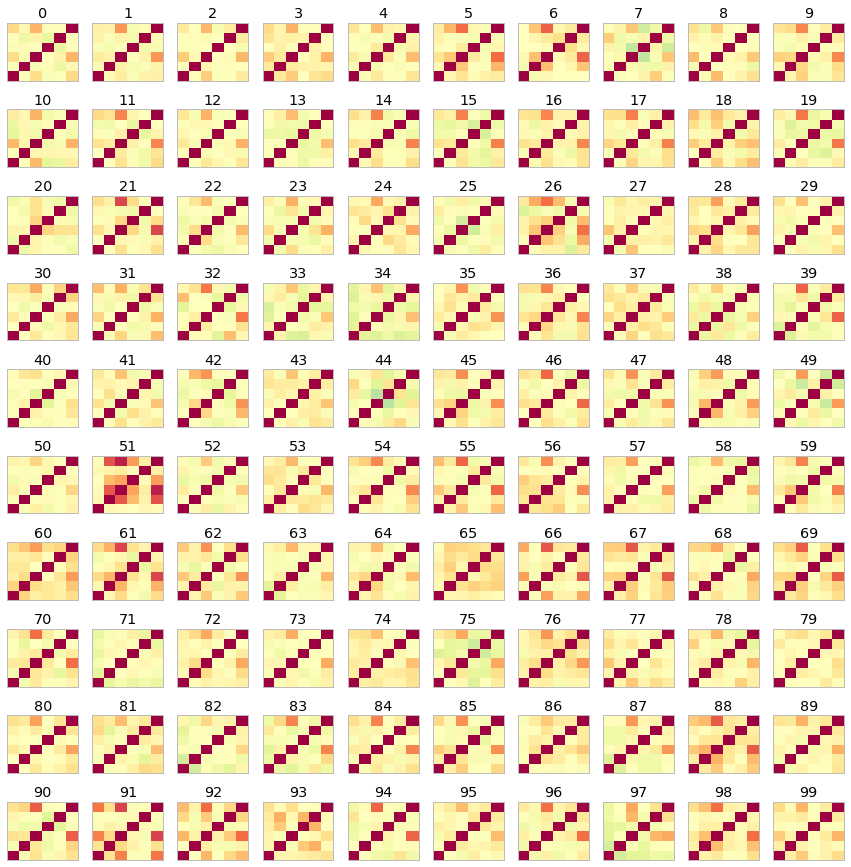

In [16]:
fig = plt.figure()
for i, t in enumerate(jsd):
    ax = fig.add_subplot(10, 10, (i+1))
    cax = ax.pcolor(t, vmin=0.0, vmax=1.0, cmap=plt.cm.Spectral)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)
#plt.colorbar(cax=cax)

['Balkenende III-PvdA', 'Kok II-PvdA', 'Balkenende I-PvdA', 'Balkenende II-PvdA', 'Balkenende IV-PvdA', 'Rutte I-PvdA']


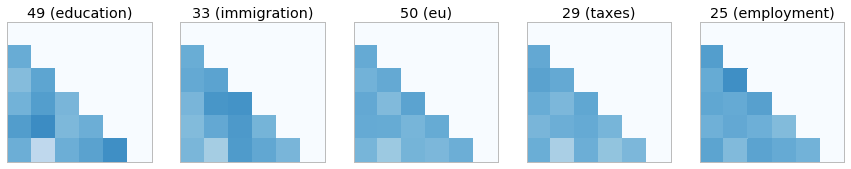

In [17]:
fig = plt.figure(figsize=(15,2.5))
indices = [49, 33, 50, 29, 25]
titles = ['49 (education)', '33 (immigration)', '50 (eu)', '29 (taxes)', '25 (employment)']
print perspectives
ordered_perspectives = ['Kok II-PvdA', 'Balkenende I-PvdA', 'Balkenende II-PvdA', 'Balkenende III-PvdA', 'Balkenende IV-PvdA', 'Rutte I-PvdA']
for i in indices:
    ax = fig.add_subplot(1, 5, indices.index(i)+1)
    t = reorder_perspectives(perspectives, ordered_perspectives, jsd[i])
    cax = ax.pcolor(np.tril(t), vmin=0.0, vmax=1.0, cmap=plt.cm.Blues)
    ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(titles[indices.index(i)])

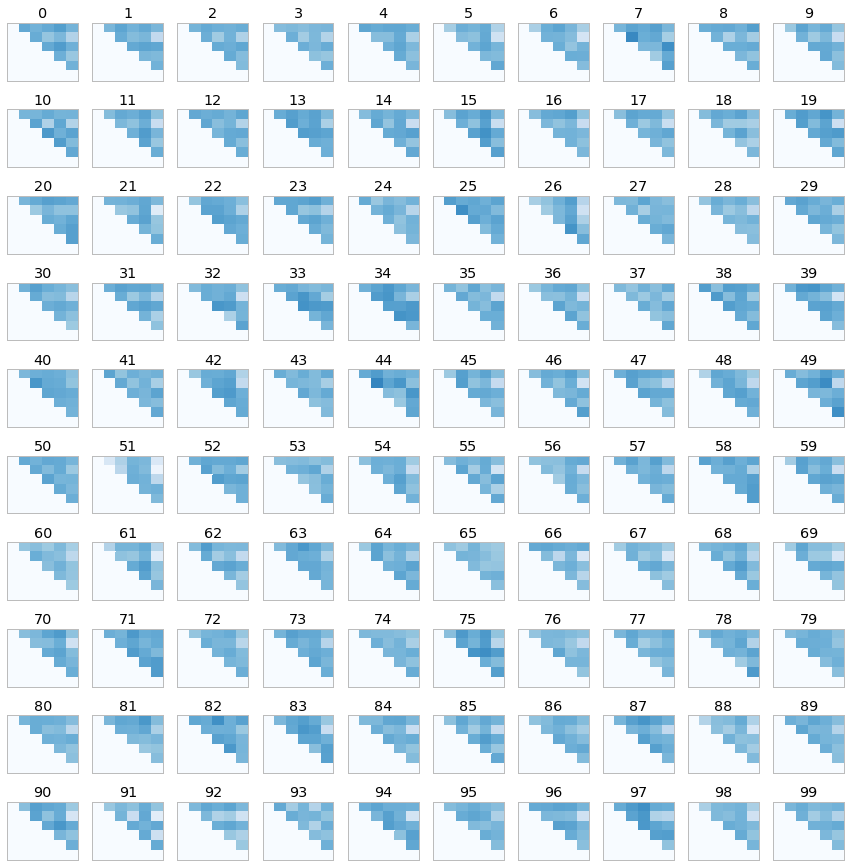

In [18]:
fig = plt.figure()
for i, t in enumerate(jsd):
    t = reorder_perspectives(perspectives, ordered_perspectives, jsd[i])
    ax = fig.add_subplot(10, 10, (i+1))
    cax = ax.pcolor(np.triu(t), vmin=0.0, vmax=1.0, cmap=plt.cm.Blues)
    ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)
#plt.colorbar(cax=cax)